In [1]:
%matplotlib inline

# Data Analysis Examples

## 1.USA.gov Data from Bitly

In [2]:
from numpy.random import randn
import numpy as np
np.random.seed(123)
import os
import matplotlib.pyplot as plt
import pandas as pd
plt.rc('figure', figsize=(15, 10))
np.set_printoptions(precision=4)
pd.options.display.max_rows = 20

In [5]: path = 'datasets/bitly_usagov/example.txt'

In [6]: open(path).readline()
Out[6]: '{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11
(KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1,
"tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l":
"orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r":
"http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u":
"http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc":
1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [3]:
import json
path = '../../code/python-for-data-analysis/datasets/bitly_usagov/example.txt'
records = [json.loads(line) for line in open(path)]
type(records)

list

In [4]:
records[:2]

[{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
  'c': 'US',
  'nk': 1,
  'tz': 'America/New_York',
  'gr': 'MA',
  'g': 'A6qOVH',
  'h': 'wfLQtf',
  'l': 'orofrog',
  'al': 'en-US,en;q=0.8',
  'hh': '1.usa.gov',
  'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
  'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
  't': 1331923247,
  'hc': 1331822918,
  'cy': 'Danvers',
  'll': [42.576698, -70.954903]},
 {'a': 'GoogleMaps/RochesterNY',
  'c': 'US',
  'nk': 0,
  'tz': 'America/Denver',
  'gr': 'UT',
  'g': 'mwszkS',
  'h': 'mwszkS',
  'l': 'bitly',
  'hh': 'j.mp',
  'r': 'http://www.AwareMap.com/',
  'u': 'http://www.monroecounty.gov/etc/911/rss.php',
  't': 1331923249,
  'hc': 1308262393,
  'cy': 'Provo',
  'll': [40.218102, -111.613297]}]

In [18]: records[0]
Out[18]:
{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko)
Chrome/17.0.963.78 Safari/535.11',
 'al': 'en-US,en;q=0.8',
 'c': 'US',
 'cy': 'Danvers',
 'g': 'A6qOVH',
 'gr': 'MA',
 'h': 'wfLQtf',
 'hc': 1331822918,
 'hh': '1.usa.gov',
 'l': 'orofrog',
 'll': [42.576698, -70.954903],
 'nk': 1,
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 't': 1331923247,
 'tz': 'America/New_York',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991'}

### Counting Time Zones in Pure Python

In [5]:
# dict.get(key) - returns None instead of throwing key not found exception
time_zones = [rec.get('tz') for rec in records]
time_zones[:5]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York']

In [6]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec]
time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

In [7]:
def get_counts(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

In [8]:
from collections import defaultdict

def get_counts2(sequence):
    counts = defaultdict(int) # values will initialize to 0
    for x in sequence:
        counts[x] += 1
    return counts

In [9]:
counts = get_counts(time_zones)
counts['America/New_York']

1251

In [10]:
counts2 = get_counts2(time_zones)
counts['America/New_York']

1251

In [11]:
len(time_zones)

3440

In [12]:
def top_counts(count_dict, n=10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

In [13]:
top_counts(counts)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

In [14]:
from collections import Counter
counts = Counter(time_zones)
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

### Counting Time Zones with pandas

In [15]:
frame = pd.DataFrame(records)
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
_heartbeat_    120 non-null float64
a              3440 non-null object
al             3094 non-null object
c              2919 non-null object
cy             2919 non-null object
g              3440 non-null object
gr             2919 non-null object
h              3440 non-null object
hc             3440 non-null float64
hh             3440 non-null object
kw             93 non-null object
l              3440 non-null object
ll             2919 non-null object
nk             3440 non-null float64
r              3440 non-null object
t              3440 non-null float64
tz             3440 non-null object
u              3440 non-null object
dtypes: float64(4), object(14)
memory usage: 500.7+ KB


In [16]:
frame.head()

_heartbeat_                                                  a  \
0          NaN  Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...   
1          NaN                             GoogleMaps/RochesterNY   
2          NaN  Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...   
3          NaN  Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...   
4          NaN  Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...   

               al   c          cy       g  gr       h            hc  \
0  en-US,en;q=0.8  US     Danvers  A6qOVH  MA  wfLQtf  1.331823e+09   
1             NaN  US       Provo  mwszkS  UT  mwszkS  1.308262e+09   
2           en-US  US  Washington  xxr3Qb  DC  xxr3Qb  1.331920e+09   
3           pt-br  BR        Braz  zCaLwp  27  zUtuOu  1.331923e+09   
4  en-US,en;q=0.8  US  Shrewsbury  9b6kNl  MA  9b6kNl  1.273672e+09   

          hh   kw         l                        ll   nk  \
0  1.usa.gov  NaN   orofrog   [42.576698, -70.954903]  1.0   
1       j.mp  NaN     bitly  [40.218102, -111.613297]  0.0   
2  1.usa.gov  NaN     bitly     [38.9007, -77.043098]  1.0   
3  1.usa.gov  NaN  alelex88  [-23.549999, -46.616699]  0.0   
4     bit.ly  NaN     bitly   [42.286499, -71.714699]  0.0   

                                                   r             t  \
0  http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...  1.331923e+09   
1                           http://www.AwareMap.com/  1.331923e+09   
2                               http://t.co/03elZC4Q  1.331923e+09   
3                                             direct  1.331923e+09   
4                http://www.shrewsbury-ma.gov/selco/  1.331923e+09   

                  tz                                                  u  
0   America/New_York        http://www.ncbi.nlm.nih.gov/pubmed/22415991  
1     America/Denver        http://www.monroecounty.gov/etc/911/rss.php  
2   America/New_York  http://boxer.senate.gov/en/press/releases/0316...  
3  America/Sao_Paulo            http://apod.nasa.gov/apod/ap120312.html  
4   America/New_York  http://www.shrewsbury-ma.gov/egov/gallery/1341...

In [17]:
frame['tz'][:10]

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

In [18]:
tz_counts = frame['tz'].value_counts()
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

In [19]:
clean_tz = frame['tz'].fillna('Missing')
clean_tz[:10]

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

In [20]:
clean_tz[clean_tz == ''] = 'Unknown'
clean_tz[:10]

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7              Unknown
8              Unknown
9              Unknown
Name: tz, dtype: object

In [21]:
tz_counts = clean_tz.value_counts()
tz_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

In [22]:
plt.figure(figsize=(10, 4))

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

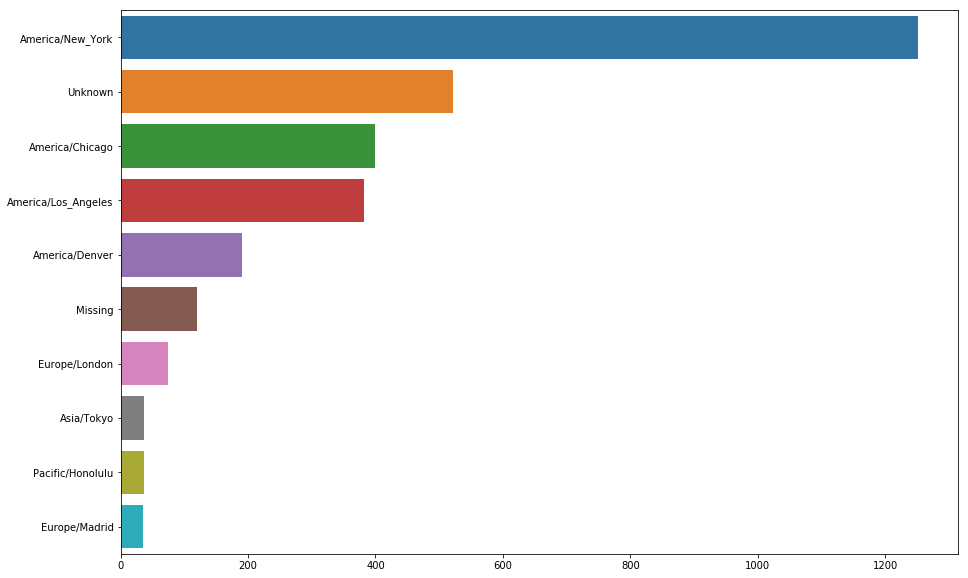

In [23]:
import seaborn as sns
subset = tz_counts[:10]
sns.barplot(y=subset.index, x=subset.values)

In [24]:
frame['a'][1]

'GoogleMaps/RochesterNY'

In [25]:
frame['a'][50]

'Mozilla/5.0 (Windows NT 5.1; rv:10.0.2) Gecko/20100101 Firefox/10.0.2'

In [26]:
frame['a'][51]

'Mozilla/5.0 (Linux; U; Android 2.2.2; en-us; LG-P925/V10e Build/FRG83G) AppleWebKit/533.1 (KHTML, like Gecko) Version/4.0 Mobile Safari/533.1'

In [27]:
frame['a'][51][:50]  # long line

'Mozilla/5.0 (Linux; U; Android 2.2.2; en-us; LG-P9'

In [28]:
results = pd.Series([x.split()[0] for x in frame.a.dropna()])
results[:5]

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

In [29]:
results.value_counts()[:8]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
dtype: int64

In [30]:
cframe = frame[frame.a.notnull()]
cframe.head()

_heartbeat_                                                  a  \
0          NaN  Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...   
1          NaN                             GoogleMaps/RochesterNY   
2          NaN  Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...   
3          NaN  Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...   
4          NaN  Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...   

               al   c          cy       g  gr       h            hc  \
0  en-US,en;q=0.8  US     Danvers  A6qOVH  MA  wfLQtf  1.331823e+09   
1             NaN  US       Provo  mwszkS  UT  mwszkS  1.308262e+09   
2           en-US  US  Washington  xxr3Qb  DC  xxr3Qb  1.331920e+09   
3           pt-br  BR        Braz  zCaLwp  27  zUtuOu  1.331923e+09   
4  en-US,en;q=0.8  US  Shrewsbury  9b6kNl  MA  9b6kNl  1.273672e+09   

          hh   kw         l                        ll   nk  \
0  1.usa.gov  NaN   orofrog   [42.576698, -70.954903]  1.0   
1       j.mp  NaN     bitly  [40.218102, -111.613297]  0.0   
2  1.usa.gov  NaN     bitly     [38.9007, -77.043098]  1.0   
3  1.usa.gov  NaN  alelex88  [-23.549999, -46.616699]  0.0   
4     bit.ly  NaN     bitly   [42.286499, -71.714699]  0.0   

                                                   r             t  \
0  http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...  1.331923e+09   
1                           http://www.AwareMap.com/  1.331923e+09   
2                               http://t.co/03elZC4Q  1.331923e+09   
3                                             direct  1.331923e+09   
4                http://www.shrewsbury-ma.gov/selco/  1.331923e+09   

                  tz                                                  u  
0   America/New_York        http://www.ncbi.nlm.nih.gov/pubmed/22415991  
1     America/Denver        http://www.monroecounty.gov/etc/911/rss.php  
2   America/New_York  http://boxer.senate.gov/en/press/releases/0316...  
3  America/Sao_Paulo            http://apod.nasa.gov/apod/ap120312.html  
4   America/New_York  http://www.shrewsbury-ma.gov/egov/gallery/1341...

In [31]:
cframe = cframe.copy()
cframe.head()

_heartbeat_                                                  a  \
0          NaN  Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...   
1          NaN                             GoogleMaps/RochesterNY   
2          NaN  Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...   
3          NaN  Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...   
4          NaN  Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...   

               al   c          cy       g  gr       h            hc  \
0  en-US,en;q=0.8  US     Danvers  A6qOVH  MA  wfLQtf  1.331823e+09   
1             NaN  US       Provo  mwszkS  UT  mwszkS  1.308262e+09   
2           en-US  US  Washington  xxr3Qb  DC  xxr3Qb  1.331920e+09   
3           pt-br  BR        Braz  zCaLwp  27  zUtuOu  1.331923e+09   
4  en-US,en;q=0.8  US  Shrewsbury  9b6kNl  MA  9b6kNl  1.273672e+09   

          hh   kw         l                        ll   nk  \
0  1.usa.gov  NaN   orofrog   [42.576698, -70.954903]  1.0   
1       j.mp  NaN     bitly  [40.218102, -111.613297]  0.0   
2  1.usa.gov  NaN     bitly     [38.9007, -77.043098]  1.0   
3  1.usa.gov  NaN  alelex88  [-23.549999, -46.616699]  0.0   
4     bit.ly  NaN     bitly   [42.286499, -71.714699]  0.0   

                                                   r             t  \
0  http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...  1.331923e+09   
1                           http://www.AwareMap.com/  1.331923e+09   
2                               http://t.co/03elZC4Q  1.331923e+09   
3                                             direct  1.331923e+09   
4                http://www.shrewsbury-ma.gov/selco/  1.331923e+09   

                  tz                                                  u  
0   America/New_York        http://www.ncbi.nlm.nih.gov/pubmed/22415991  
1     America/Denver        http://www.monroecounty.gov/etc/911/rss.php  
2   America/New_York  http://boxer.senate.gov/en/press/releases/0316...  
3  America/Sao_Paulo            http://apod.nasa.gov/apod/ap120312.html  
4   America/New_York  http://www.shrewsbury-ma.gov/egov/gallery/1341...

In [32]:
cframe['os'] = np.where(cframe['a'].str.contains('Windows'),
                        'Windows', 'Not Windows')
cframe['os'][:5]

0        Windows
1    Not Windows
2        Windows
3    Not Windows
4        Windows
Name: os, dtype: object

In [33]:
cframe.head()

_heartbeat_                                                  a  \
0          NaN  Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...   
1          NaN                             GoogleMaps/RochesterNY   
2          NaN  Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...   
3          NaN  Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...   
4          NaN  Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...   

               al   c          cy       g  gr       h            hc  \
0  en-US,en;q=0.8  US     Danvers  A6qOVH  MA  wfLQtf  1.331823e+09   
1             NaN  US       Provo  mwszkS  UT  mwszkS  1.308262e+09   
2           en-US  US  Washington  xxr3Qb  DC  xxr3Qb  1.331920e+09   
3           pt-br  BR        Braz  zCaLwp  27  zUtuOu  1.331923e+09   
4  en-US,en;q=0.8  US  Shrewsbury  9b6kNl  MA  9b6kNl  1.273672e+09   

          hh   kw         l                        ll   nk  \
0  1.usa.gov  NaN   orofrog   [42.576698, -70.954903]  1.0   
1       j.mp  NaN     bitly  [40.218102, -111.613297]  0.0   
2  1.usa.gov  NaN     bitly     [38.9007, -77.043098]  1.0   
3  1.usa.gov  NaN  alelex88  [-23.549999, -46.616699]  0.0   
4     bit.ly  NaN     bitly   [42.286499, -71.714699]  0.0   

                                                   r             t  \
0  http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...  1.331923e+09   
1                           http://www.AwareMap.com/  1.331923e+09   
2                               http://t.co/03elZC4Q  1.331923e+09   
3                                             direct  1.331923e+09   
4                http://www.shrewsbury-ma.gov/selco/  1.331923e+09   

                  tz                                                  u  \
0   America/New_York        http://www.ncbi.nlm.nih.gov/pubmed/22415991   
1     America/Denver        http://www.monroecounty.gov/etc/911/rss.php   
2   America/New_York  http://boxer.senate.gov/en/press/releases/0316...   
3  America/Sao_Paulo            http://apod.nasa.gov/apod/ap120312.html   
4   America/New_York  http://www.shrewsbury-ma.gov/egov/gallery/1341...   

            os  
0      Windows  
1  Not Windows  
2      Windows  
3  Not Windows  
4      Windows

In [34]:
by_tz_os = cframe.groupby(['tz', 'os'])

In [35]:
agg_counts = by_tz_os.size().unstack().fillna(0)
agg_counts[:10]

os                              Not Windows  Windows
tz                                                  
                                      245.0    276.0
Africa/Cairo                            0.0      3.0
Africa/Casablanca                       0.0      1.0
Africa/Ceuta                            0.0      2.0
Africa/Johannesburg                     0.0      1.0
Africa/Lusaka                           0.0      1.0
America/Anchorage                       4.0      1.0
America/Argentina/Buenos_Aires          1.0      0.0
America/Argentina/Cordoba               0.0      1.0
America/Argentina/Mendoza               0.0      1.0

In [36]:
# Use to sort in ascending order
indexer = agg_counts.sum(1).argsort()
indexer[:10]

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
dtype: int64

In [37]:
count_subset = agg_counts.take(indexer[-10:])
count_subset

os                   Not Windows  Windows
tz                                       
America/Sao_Paulo           13.0     20.0
Europe/Madrid               16.0     19.0
Pacific/Honolulu             0.0     36.0
Asia/Tokyo                   2.0     35.0
Europe/London               43.0     31.0
America/Denver             132.0     59.0
America/Los_Angeles        130.0    252.0
America/Chicago            115.0    285.0
                           245.0    276.0
America/New_York           339.0    912.0

In [38]:
agg_counts.sum(1).nlargest(10)

tz
America/New_York       1251.0
                        521.0
America/Chicago         400.0
America/Los_Angeles     382.0
America/Denver          191.0
Europe/London            74.0
Asia/Tokyo               37.0
Pacific/Honolulu         36.0
Europe/Madrid            35.0
America/Sao_Paulo        33.0
dtype: float64

In [39]:
plt.figure()

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

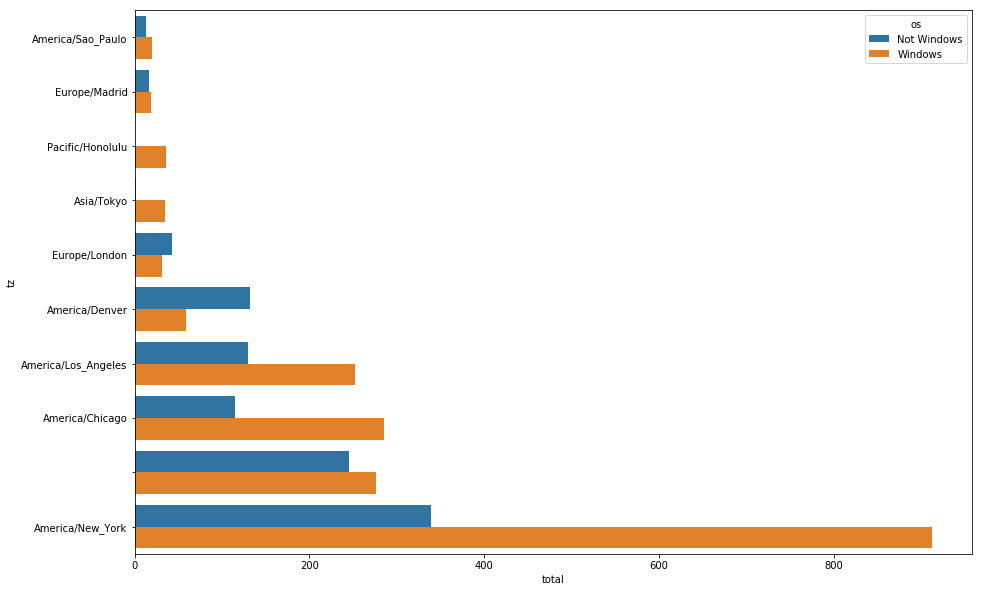

In [40]:
# Rearrange the data for plotting
count_subset = count_subset.stack()
count_subset.name = 'total'
count_subset = count_subset.reset_index()
count_subset[:10]
sns.barplot(x='total', y='tz', hue='os',  data=count_subset)

In [41]:
def norm_total(group):
    group['normed_total'] = group.total / group.total.sum()
    return group

results = count_subset.groupby('tz').apply(norm_total)

In [42]:
plt.figure()

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

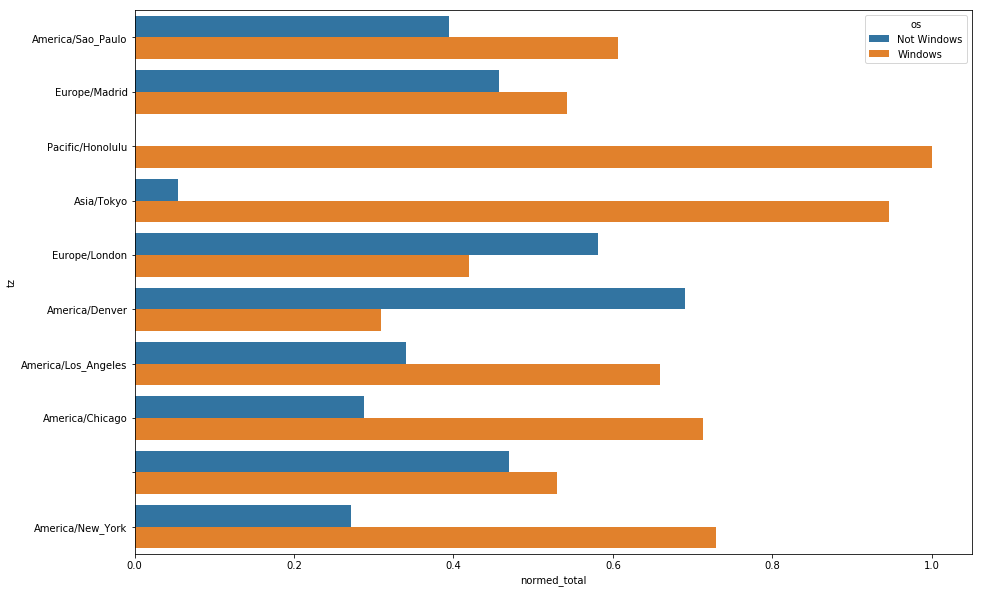

In [43]:
sns.barplot(x='normed_total', y='tz', hue='os',  data=results)

In [44]:
g = count_subset.groupby('tz')
results2 = count_subset.total / g.total.transform('sum')

## MovieLens 1M Dataset

In [45]:
import pandas as pd

# Make display smaller
pd.options.display.max_rows = 10

unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('../../code/python-for-data-analysis/datasets/movielens/users.dat'
                      , sep='::', header=None, names=unames)
users.head()

C:\ProgramData\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


user_id gender  age  occupation    zip
0        1      F    1          10  48067
1        2      M   56          16  70072
2        3      M   25          15  55117
3        4      M   45           7  02460
4        5      M   25          20  55455

In [46]:
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('../../code/python-for-data-analysis/datasets/movielens/ratings.dat'
                        , sep='::', header=None, names=rnames)
ratings.head()

C:\ProgramData\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


user_id  movie_id  rating  timestamp
0        1      1193       5  978300760
1        1       661       3  978302109
2        1       914       3  978301968
3        1      3408       4  978300275
4        1      2355       5  978824291

In [47]:
mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('../../code/python-for-data-analysis/datasets/movielens/movies.dat'
                       , sep='::', header=None, names=mnames)
movies.head()

C:\ProgramData\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


movie_id                               title                        genres
0         1                    Toy Story (1995)   Animation|Children's|Comedy
1         2                      Jumanji (1995)  Adventure|Children's|Fantasy
2         3             Grumpier Old Men (1995)                Comedy|Romance
3         4            Waiting to Exhale (1995)                  Comedy|Drama
4         5  Father of the Bride Part II (1995)                        Comedy

In [48]:
ratings

user_id  movie_id  rating  timestamp
0              1      1193       5  978300760
1              1       661       3  978302109
2              1       914       3  978301968
3              1      3408       4  978300275
4              1      2355       5  978824291
...          ...       ...     ...        ...
1000204     6040      1091       1  956716541
1000205     6040      1094       5  956704887
1000206     6040       562       5  956704746
1000207     6040      1096       4  956715648
1000208     6040      1097       4  956715569

[1000209 rows x 4 columns]

In [49]:
data = pd.merge(pd.merge(ratings, users), movies)
data

user_id  movie_id  rating  timestamp gender  age  occupation    zip  \
0              1      1193       5  978300760      F    1          10  48067   
1              2      1193       5  978298413      M   56          16  70072   
2             12      1193       4  978220179      M   25          12  32793   
3             15      1193       4  978199279      M   25           7  22903   
4             17      1193       5  978158471      M   50           1  95350   
...          ...       ...     ...        ...    ...  ...         ...    ...   
1000204     5949      2198       5  958846401      M   18          17  47901   
1000205     5675      2703       3  976029116      M   35          14  30030   
1000206     5780      2845       1  958153068      M   18          17  92886   
1000207     5851      3607       5  957756608      F   18          20  55410   
1000208     5938      2909       4  957273353      M   25           1  35401   

                                               title                genres  
0             One Flew Over the Cuckoo's Nest (1975)                 Drama  
1             One Flew Over the Cuckoo's Nest (1975)                 Drama  
2             One Flew Over the Cuckoo's Nest (1975)                 Drama  
3             One Flew Over the Cuckoo's Nest (1975)                 Drama  
4             One Flew Over the Cuckoo's Nest (1975)                 Drama  
...                                              ...                   ...  
1000204                           Modulations (1998)           Documentary  
1000205                        Broken Vessels (1998)                 Drama  
1000206                            White Boys (1999)                 Drama  
1000207                     One Little Indian (1973)  Comedy|Drama|Western  
1000208  Five Wives, Three Secretaries and Me (1998)           Documentary  

[1000209 rows x 10 columns]

In [50]:
data.iloc[0]

user_id                                            1
movie_id                                        1193
rating                                             5
timestamp                                  978300760
gender                                             F
age                                                1
occupation                                        10
zip                                            48067
title         One Flew Over the Cuckoo's Nest (1975)
genres                                         Drama
Name: 0, dtype: object

In [51]:
mean_ratings = data.pivot_table('rating', index='title',
                                columns='gender', aggfunc='mean')
mean_ratings[:5]

gender                                F         M
title                                            
$1,000,000 Duck (1971)         3.375000  2.761905
'Night Mother (1986)           3.388889  3.352941
'Til There Was You (1997)      2.675676  2.733333
'burbs, The (1989)             2.793478  2.962085
...And Justice for All (1979)  3.828571  3.689024

In [52]:
ratings_by_title = data.groupby('title').size()
ratings_by_title[:10]

title
$1,000,000 Duck (1971)                37
'Night Mother (1986)                  70
'Til There Was You (1997)             52
'burbs, The (1989)                   303
...And Justice for All (1979)        199
1-900 (1994)                           2
10 Things I Hate About You (1999)    700
101 Dalmatians (1961)                565
101 Dalmatians (1996)                364
12 Angry Men (1957)                  616
dtype: int64

In [53]:
active_titles = ratings_by_title.index[ratings_by_title >= 250]
active_titles

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1216)

In [54]:
# Select rows on the index
mean_ratings = mean_ratings.loc[active_titles]
mean_ratings

gender                                    F         M
title                                                
'burbs, The (1989)                 2.793478  2.962085
10 Things I Hate About You (1999)  3.646552  3.311966
101 Dalmatians (1961)              3.791444  3.500000
101 Dalmatians (1996)              3.240000  2.911215
12 Angry Men (1957)                4.184397  4.328421
...                                     ...       ...
Young Guns (1988)                  3.371795  3.425620
Young Guns II (1990)               2.934783  2.904025
Young Sherlock Holmes (1985)       3.514706  3.363344
Zero Effect (1998)                 3.864407  3.723140
eXistenZ (1999)                    3.098592  3.289086

[1216 rows x 2 columns]

In [55]:
mean_ratings = mean_ratings.rename(index={'Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)':
                           'Seven Samurai (Shichinin no samurai) (1954)'})

In [56]:
top_female_ratings = mean_ratings.sort_values(by='F', ascending=False)
top_female_ratings[:10]

gender                                                     F         M
title                                                                 
Close Shave, A (1995)                               4.644444  4.473795
Wrong Trousers, The (1993)                          4.588235  4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)       4.572650  4.464589
Wallace & Gromit: The Best of Aardman Animation...  4.563107  4.385075
Schindler's List (1993)                             4.562602  4.491415
Shawshank Redemption, The (1994)                    4.539075  4.560625
Grand Day Out, A (1992)                             4.537879  4.293255
To Kill a Mockingbird (1962)                        4.536667  4.372611
Creature Comforts (1990)                            4.513889  4.272277
Usual Suspects, The (1995)                          4.513317  4.518248

### Measuring Rating Disagreement

In [57]:
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']

In [58]:
sorted_by_diff = mean_ratings.sort_values(by='diff')
sorted_by_diff[:10]

gender                                        F         M      diff
title                                                              
Dirty Dancing (1987)                   3.790378  2.959596 -0.830782
Jumpin' Jack Flash (1986)              3.254717  2.578358 -0.676359
Grease (1978)                          3.975265  3.367041 -0.608224
Little Women (1994)                    3.870588  3.321739 -0.548849
Steel Magnolias (1989)                 3.901734  3.365957 -0.535777
Anastasia (1997)                       3.800000  3.281609 -0.518391
Rocky Horror Picture Show, The (1975)  3.673016  3.160131 -0.512885
Color Purple, The (1985)               4.158192  3.659341 -0.498851
Age of Innocence, The (1993)           3.827068  3.339506 -0.487561
Free Willy (1993)                      2.921348  2.438776 -0.482573

In [59]:
# Reverse order of rows, take first 10 rows
sorted_by_diff[::-1][:10]

gender                                         F         M      diff
title                                                               
Good, The Bad and The Ugly, The (1966)  3.494949  4.221300  0.726351
Kentucky Fried Movie, The (1977)        2.878788  3.555147  0.676359
Dumb & Dumber (1994)                    2.697987  3.336595  0.638608
Longest Day, The (1962)                 3.411765  4.031447  0.619682
Cable Guy, The (1996)                   2.250000  2.863787  0.613787
Evil Dead II (Dead By Dawn) (1987)      3.297297  3.909283  0.611985
Hidden, The (1987)                      3.137931  3.745098  0.607167
Rocky III (1982)                        2.361702  2.943503  0.581801
Caddyshack (1980)                       3.396135  3.969737  0.573602
For a Few Dollars More (1965)           3.409091  3.953795  0.544704

In [60]:
# Standard deviation of rating grouped by title
rating_std_by_title = data.groupby('title')['rating'].std()

# Filter down to active_titles
rating_std_by_title = rating_std_by_title.loc[active_titles]

# Order Series by value in descending order
rating_std_by_title.sort_values(ascending=False)[:10]

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Eyes Wide Shut (1999)                    1.259624
Evita (1996)                             1.253631
Billy Madison (1995)                     1.249970
Fear and Loathing in Las Vegas (1998)    1.246408
Bicentennial Man (1999)                  1.245533
Name: rating, dtype: float64

## US Baby Names 1880–2010

In [4]: names.head(10)
Out[4]:
        name sex  births  year
0       Mary   F    7065  1880
1       Anna   F    2604  1880
2       Emma   F    2003  1880
3  Elizabeth   F    1939  1880
4     Minnie   F    1746  1880
5   Margaret   F    1578  1880
6        Ida   F    1472  1880
7      Alice   F    1414  1880
8     Bertha   F    1320  1880
9      Sarah   F    1288  1880

In [61]:
!head -n 10 ../../code/python-for-data-analysis/datasets/babynames/yob1880.txt

Mary,F,7065
Anna,F,2604
Emma,F,2003
Elizabeth,F,1939
Minnie,F,1746
Margaret,F,1578
Ida,F,1472
Alice,F,1414
Bertha,F,1320
Sarah,F,1288


In [62]:
import pandas as pd
names1880 = pd.read_csv('../../code/python-for-data-analysis/datasets/babynames/yob1880.txt',
                        names=['name', 'sex', 'births'])
names1880

name sex  births
0          Mary   F    7065
1          Anna   F    2604
2          Emma   F    2003
3     Elizabeth   F    1939
4        Minnie   F    1746
...         ...  ..     ...
1995     Woodie   M       5
1996     Worthy   M       5
1997     Wright   M       5
1998       York   M       5
1999  Zachariah   M       5

[2000 rows x 3 columns]

In [63]:
names1880.groupby('sex').births.sum()

sex
F     90993
M    110493
Name: births, dtype: int64

In [64]:
years = range(1880, 2011)

pieces = []
columns = ['name', 'sex', 'births']

for year in years:
    path = '../../code/python-for-data-analysis/datasets/babynames/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)

    frame['year'] = year
    pieces.append(frame)

# Concatenate everything into a single DataFrame
names = pd.concat(pieces, ignore_index=True)

In [65]:
names

name sex  births  year
0             Mary   F    7065  1880
1             Anna   F    2604  1880
2             Emma   F    2003  1880
3        Elizabeth   F    1939  1880
4           Minnie   F    1746  1880
...            ...  ..     ...   ...
1690779    Zymaire   M       5  2010
1690780     Zyonne   M       5  2010
1690781  Zyquarius   M       5  2010
1690782      Zyran   M       5  2010
1690783      Zzyzx   M       5  2010

[1690784 rows x 4 columns]

In [66]:
total_births = names.pivot_table('births', index='year',
                                 columns='sex', aggfunc=sum)
total_births.tail()

sex         F        M
year                  
2006  1896468  2050234
2007  1916888  2069242
2008  1883645  2032310
2009  1827643  1973359
2010  1759010  1898382

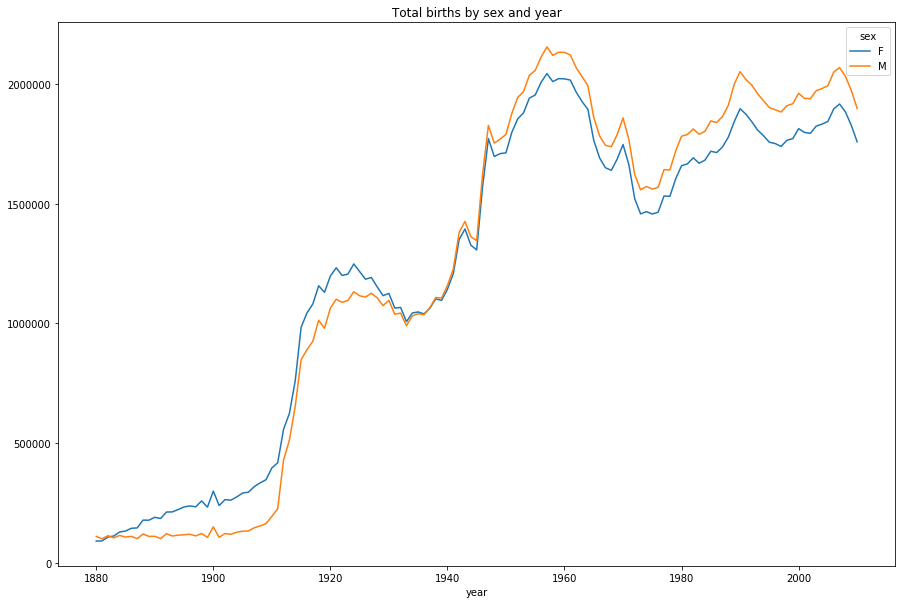

In [67]:
total_births.plot(title='Total births by sex and year')

In [68]:
def add_prop(group):
    group['prop'] = group.births / group.births.sum()
    return group
names = names.groupby(['year', 'sex']).apply(add_prop)

In [69]:
names

name sex  births  year      prop
0             Mary   F    7065  1880  0.077643
1             Anna   F    2604  1880  0.028618
2             Emma   F    2003  1880  0.022013
3        Elizabeth   F    1939  1880  0.021309
4           Minnie   F    1746  1880  0.019188
...            ...  ..     ...   ...       ...
1690779    Zymaire   M       5  2010  0.000003
1690780     Zyonne   M       5  2010  0.000003
1690781  Zyquarius   M       5  2010  0.000003
1690782      Zyran   M       5  2010  0.000003
1690783      Zzyzx   M       5  2010  0.000003

[1690784 rows x 5 columns]

In [70]:
names.groupby(['year', 'sex']).prop.sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2008  M      1.0
2009  F      1.0
      M      1.0
2010  F      1.0
      M      1.0
Name: prop, Length: 262, dtype: float64

In [71]:
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]
grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)
# Drop the group index, not needed
top1000.reset_index(inplace=True, drop=True)

pieces = []
for year, group in names.groupby(['year', 'sex']):
    pieces.append(group.sort_values(by='births', ascending=False)[:1000])
top1000 = pd.concat(pieces, ignore_index=True)

In [72]:
top1000

name sex  births  year      prop
0            Mary   F    7065  1880  0.077643
1            Anna   F    2604  1880  0.028618
2            Emma   F    2003  1880  0.022013
3       Elizabeth   F    1939  1880  0.021309
4          Minnie   F    1746  1880  0.019188
...           ...  ..     ...   ...       ...
261872     Camilo   M     194  2010  0.000102
261873     Destin   M     194  2010  0.000102
261874     Jaquan   M     194  2010  0.000102
261875     Jaydan   M     194  2010  0.000102
261876     Maxton   M     193  2010  0.000102

[261877 rows x 5 columns]

### Analyzing Naming Trends

In [73]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

In [74]:
total_births = top1000.pivot_table('births', index='year',
                                   columns='name',
                                   aggfunc=sum)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Columns: 6868 entries, Aaden to Zuri
dtypes: float64(6868)
memory usage: 6.9 MB


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000018C048C2160>,
      dtype=object)

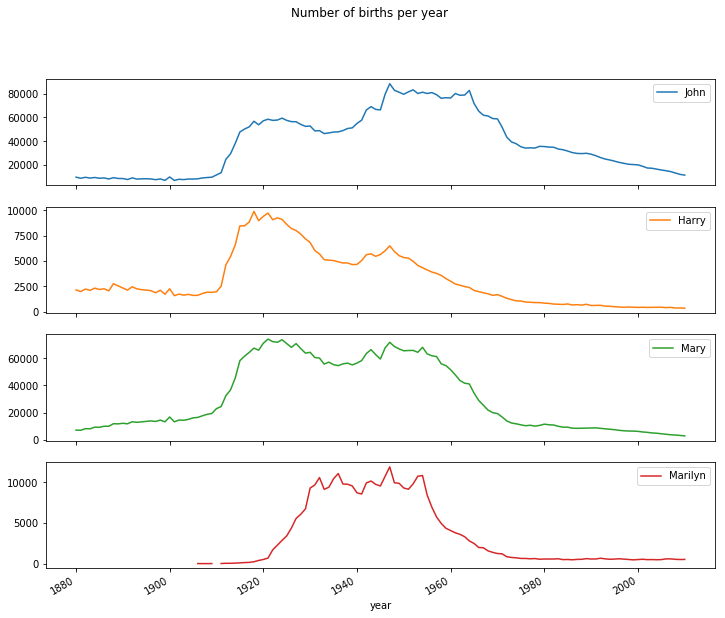

In [75]:
total_births.info()
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]
subset.plot(subplots=True, figsize=(12, 10), grid=False,
            title="Number of births per year")

#### Measuring the increase in naming diversity

In [76]:
plt.figure()

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

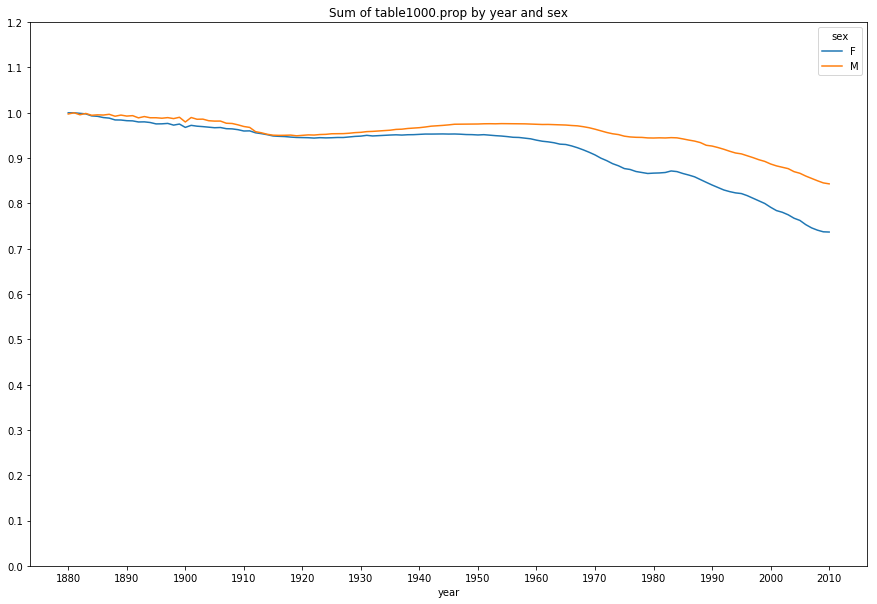

In [77]:
table = top1000.pivot_table('prop', index='year',
                            columns='sex', aggfunc=sum)
table.plot(title='Sum of table1000.prop by year and sex',
           yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2020, 10))

In [78]:
df = boys[boys.year == 2010]
df

name sex  births  year      prop
260877    Jacob   M   21875  2010  0.011523
260878    Ethan   M   17866  2010  0.009411
260879  Michael   M   17133  2010  0.009025
260880   Jayden   M   17030  2010  0.008971
260881  William   M   16870  2010  0.008887
...         ...  ..     ...   ...       ...
261872   Camilo   M     194  2010  0.000102
261873   Destin   M     194  2010  0.000102
261874   Jaquan   M     194  2010  0.000102
261875   Jaydan   M     194  2010  0.000102
261876   Maxton   M     193  2010  0.000102

[1000 rows x 5 columns]

In [79]:
prop_cumsum = df.sort_values(by='prop', ascending=False).prop.cumsum()
prop_cumsum[:10]
prop_cumsum.values.searchsorted(0.5)

116

In [80]:
df = boys[boys.year == 1900]
in1900 = df.sort_values(by='prop', ascending=False).prop.cumsum()
in1900.values.searchsorted(0.5) + 1

25

In [81]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values(by='prop', ascending=False)
    return group.prop.cumsum().values.searchsorted(q) + 1

diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')

In [82]:
fig = plt.figure()

<Figure size 1080x720 with 0 Axes>

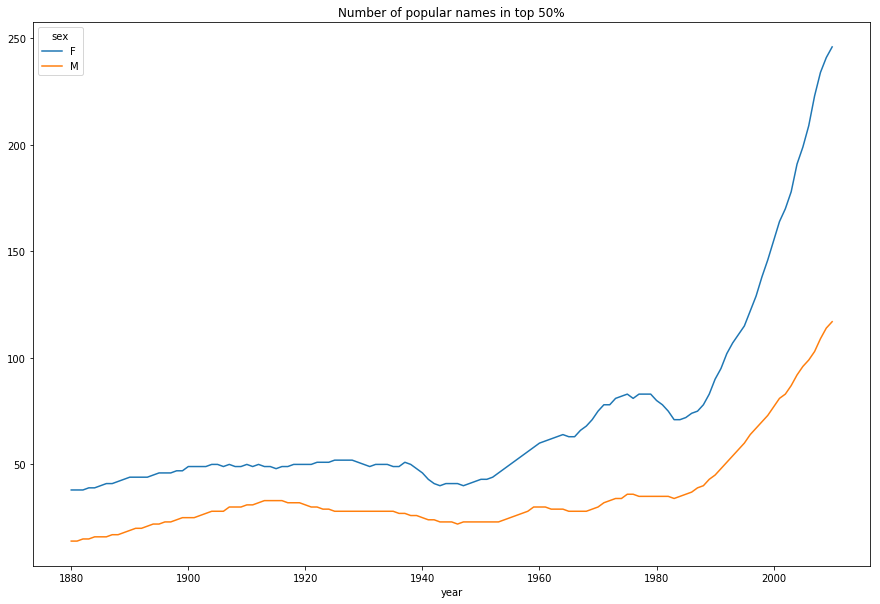

In [83]:
diversity.head()
diversity.plot(title="Number of popular names in top 50%")

#### The “last letter” revolution

In [84]:
# extract last letter from name column
get_last_letter = lambda x: x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'

table = names.pivot_table('births', index=last_letters,
                          columns=['sex', 'year'], aggfunc=sum)

In [85]:
subtable = table.reindex(columns=[1910, 1960, 2010], level='year')
subtable.head()

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                 NaN     694.0     450.0    411.0    3912.0   38859.0
c                 5.0      49.0     946.0    482.0   15476.0   23125.0
d              6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e            133569.0  435013.0  313833.0  28655.0  178823.0  129012.0

In [86]:
subtable.sum()
letter_prop = subtable / subtable.sum()
letter_prop

sex                 F                             M                    
year             1910      1960      2010      1910      1960      2010
last_letter                                                            
a            0.273390  0.341853  0.381240  0.005031  0.002440  0.014980
b                 NaN  0.000343  0.000256  0.002116  0.001834  0.020470
c            0.000013  0.000024  0.000538  0.002482  0.007257  0.012181
d            0.017028  0.001844  0.001482  0.113858  0.122908  0.023387
e            0.336941  0.215133  0.178415  0.147556  0.083853  0.067959
...               ...       ...       ...       ...       ...       ...
v                 NaN  0.000060  0.000117  0.000113  0.000037  0.001434
w            0.000020  0.000031  0.001182  0.006329  0.007711  0.016148
x            0.000015  0.000037  0.000727  0.003965  0.001851  0.008614
y            0.110972  0.152569  0.116828  0.077349  0.160987  0.058168
z            0.002439  0.000659  0.000704  0.000170  0.000184  0.001831

[26 rows x 6 columns]

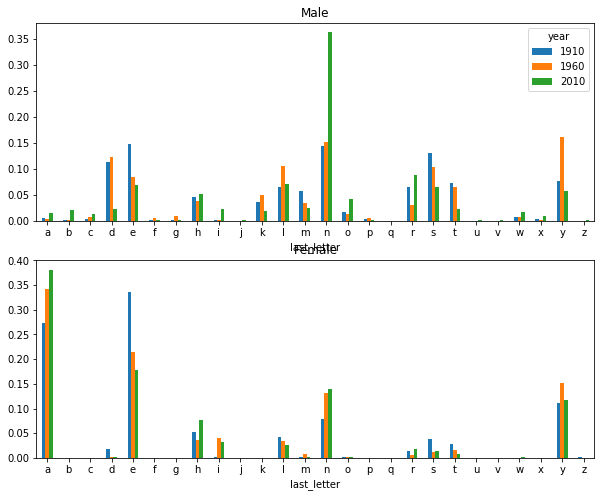

In [87]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(10, 8))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female',
                      legend=False)

In [88]:
plt.subplots_adjust(hspace=0.25)

<Figure size 1080x720 with 0 Axes>

In [89]:
letter_prop = table / table.sum()
dny_ts = letter_prop.loc[['d', 'n', 'y'], 'M'].T
dny_ts.head()

last_letter         d         n         y
year                                     
1880         0.083055  0.153213  0.075760
1881         0.083247  0.153214  0.077451
1882         0.085340  0.149560  0.077537
1883         0.084066  0.151646  0.079144
1884         0.086120  0.149915  0.080405

In [90]:
plt.close('all')

In [91]:
fig = plt.figure()

<Figure size 1080x720 with 0 Axes>

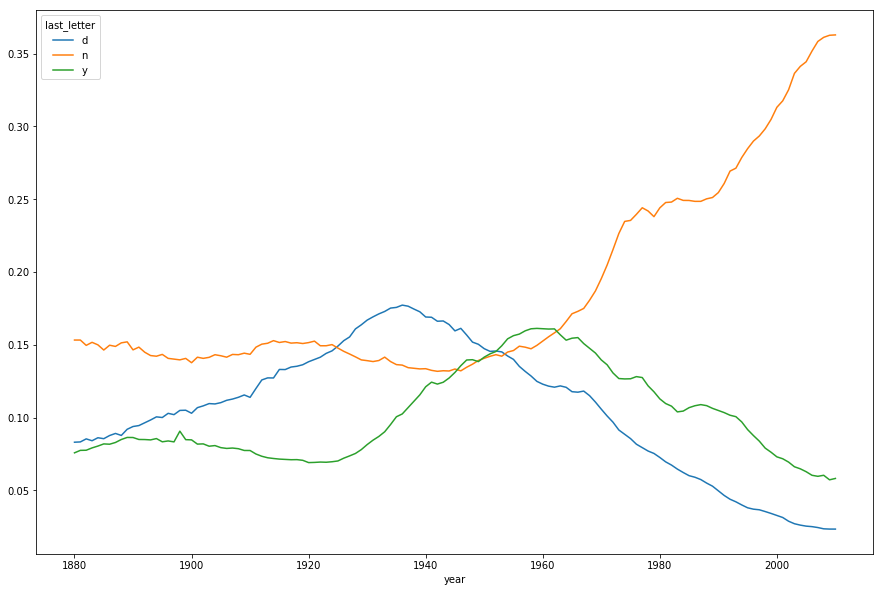

In [92]:
dny_ts.plot()

#### Boy names that became girl names (and vice versa)

In [93]:
all_names = pd.Series(top1000.name.unique())
lesley_like = all_names[all_names.str.lower().str.contains('lesl')]
lesley_like

632     Leslie
2294    Lesley
4262    Leslee
4728     Lesli
6103     Lesly
dtype: object

In [94]:
filtered = top1000[top1000.name.isin(lesley_like)]
filtered.groupby('name').births.sum()

name
Leslee      1082
Lesley     35022
Lesli        929
Leslie    370429
Lesly      10067
Name: births, dtype: int64

In [95]:
table = filtered.pivot_table('births', index='year',
                             columns='sex', aggfunc='sum')
table = table.div(table.sum(1), axis=0)
table.tail()

sex     F   M
year         
2006  1.0 NaN
2007  1.0 NaN
2008  1.0 NaN
2009  1.0 NaN
2010  1.0 NaN

In [96]:
fig = plt.figure()

<Figure size 1080x720 with 0 Axes>

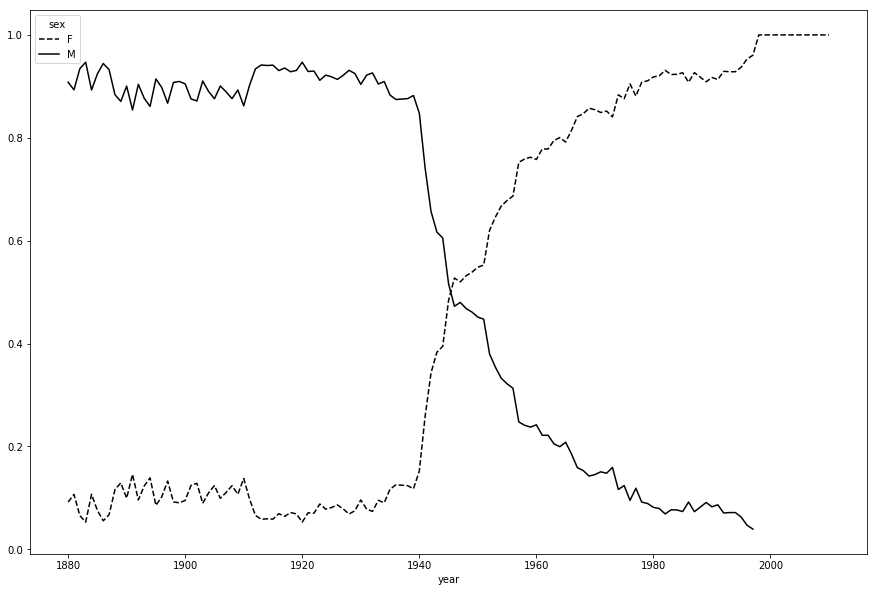

In [97]:
table.plot(style={'M': 'k-', 'F': 'k--'})

## USDA Food Database

{
  "id": 21441,
  "description": "KENTUCKY FRIED CHICKEN, Fried Chicken, EXTRA CRISPY,
Wing, meat and skin with breading",
  "tags": ["KFC"],
  "manufacturer": "Kentucky Fried Chicken",
  "group": "Fast Foods",
  "portions": [
    {
      "amount": 1,
      "unit": "wing, with skin",
      "grams": 68.0
    },

    ...
  ],
  "nutrients": [
    {
      "value": 20.8,
      "units": "g",
      "description": "Protein",
      "group": "Composition"
    },

    ...
  ]
}

In [98]:
import json
db = json.load(open('../../code/python-for-data-analysis/datasets/usda_food/database.json'))
len(db)

6636

In [99]:
db[0].keys()
db[0]['nutrients'][0]
nutrients = pd.DataFrame(db[0]['nutrients'])
nutrients[:7]

description        group units    value
0                      Protein  Composition     g    25.18
1            Total lipid (fat)  Composition     g    29.20
2  Carbohydrate, by difference  Composition     g     3.06
3                          Ash        Other     g     3.28
4                       Energy       Energy  kcal   376.00
5                        Water  Composition     g    39.28
6                       Energy       Energy    kJ  1573.00

In [100]:
info_keys = ['description', 'group', 'id', 'manufacturer']
info = pd.DataFrame(db, columns=info_keys)
info[:5]
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
description     6636 non-null object
group           6636 non-null object
id              6636 non-null int64
manufacturer    5195 non-null object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


In [101]:
pd.value_counts(info.group)[:10]

Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Fast Foods                           365
Legumes and Legume Products          365
Lamb, Veal, and Game Products        345
Sweets                               341
Pork Products                        328
Fruits and Fruit Juices              328
Name: group, dtype: int64

In [102]:
nutrients = []

for rec in db:
    fnuts = pd.DataFrame(rec['nutrients'])
    fnuts['id'] = rec['id']
    nutrients.append(fnuts)

nutrients = pd.concat(nutrients, ignore_index=True)

In [103]:
nutrients

description        group units    value     id
0                                  Protein  Composition     g   25.180   1008
1                        Total lipid (fat)  Composition     g   29.200   1008
2              Carbohydrate, by difference  Composition     g    3.060   1008
3                                      Ash        Other     g    3.280   1008
4                                   Energy       Energy  kcal  376.000   1008
...                                    ...          ...   ...      ...    ...
389350                 Vitamin B-12, added     Vitamins   mcg    0.000  43546
389351                         Cholesterol        Other    mg    0.000  43546
389352        Fatty acids, total saturated        Other     g    0.072  43546
389353  Fatty acids, total monounsaturated        Other     g    0.028  43546
389354  Fatty acids, total polyunsaturated        Other     g    0.041  43546

[389355 rows x 5 columns]

In [104]:
nutrients.duplicated().sum()  # number of duplicates
nutrients = nutrients.drop_duplicates()

In [105]:
col_mapping = {'description' : 'food',
               'group'       : 'fgroup'}
info = info.rename(columns=col_mapping, copy=False)
info.info()
col_mapping = {'description' : 'nutrient',
               'group' : 'nutgroup'}
nutrients = nutrients.rename(columns=col_mapping, copy=False)
nutrients

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
food            6636 non-null object
fgroup          6636 non-null object
id              6636 non-null int64
manufacturer    5195 non-null object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


nutrient     nutgroup units    value     id
0                                  Protein  Composition     g   25.180   1008
1                        Total lipid (fat)  Composition     g   29.200   1008
2              Carbohydrate, by difference  Composition     g    3.060   1008
3                                      Ash        Other     g    3.280   1008
4                                   Energy       Energy  kcal  376.000   1008
...                                    ...          ...   ...      ...    ...
389350                 Vitamin B-12, added     Vitamins   mcg    0.000  43546
389351                         Cholesterol        Other    mg    0.000  43546
389352        Fatty acids, total saturated        Other     g    0.072  43546
389353  Fatty acids, total monounsaturated        Other     g    0.028  43546
389354  Fatty acids, total polyunsaturated        Other     g    0.041  43546

[375176 rows x 5 columns]

In [106]:
ndata = pd.merge(nutrients, info, on='id', how='outer')
ndata.info()
ndata.iloc[30000]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375176 entries, 0 to 375175
Data columns (total 8 columns):
nutrient        375176 non-null object
nutgroup        375176 non-null object
units           375176 non-null object
value           375176 non-null float64
id              375176 non-null int64
food            375176 non-null object
fgroup          375176 non-null object
manufacturer    293054 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 25.8+ MB


nutrient                                       Glycine
nutgroup                                   Amino Acids
units                                                g
value                                             0.04
id                                                6158
food            Soup, tomato bisque, canned, condensed
fgroup                      Soups, Sauces, and Gravies
manufacturer                                          
Name: 30000, dtype: object

In [107]:
fig = plt.figure()

<Figure size 1080x720 with 0 Axes>

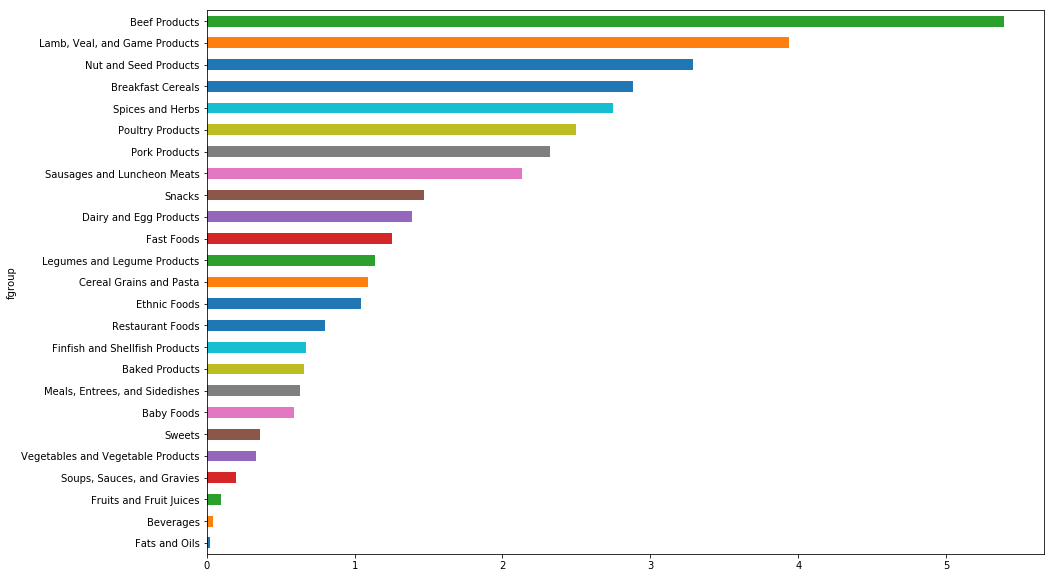

In [108]:
result = ndata.groupby(['nutrient', 'fgroup'])['value'].quantile(0.5)
result['Zinc, Zn'].sort_values().plot(kind='barh')

In [109]:
by_nutrient = ndata.groupby(['nutgroup', 'nutrient'])

get_maximum = lambda x: x.loc[x.value.idxmax()]
get_minimum = lambda x: x.loc[x.value.idxmin()]

max_foods = by_nutrient.apply(get_maximum)[['value', 'food']]

# make the food a little smaller
max_foods.food = max_foods.food.str[:50]

In [110]:
max_foods.loc['Amino Acids']['food']

nutrient
Alanine                          Gelatins, dry powder, unsweetened
Arginine                              Seeds, sesame flour, low-fat
Aspartic acid                                  Soy protein isolate
Cystine               Seeds, cottonseed flour, low fat (glandless)
Glutamic acid                                  Soy protein isolate
                                       ...                        
Serine           Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Threonine        Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Tryptophan        Sea lion, Steller, meat with fat (Alaska Native)
Tyrosine         Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Valine           Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Name: food, Length: 19, dtype: object

## 2012 Federal Election Commission Database

In [111]:
fec = pd.read_csv('../../code/python-for-data-analysis/datasets/fec/P00000001-ALL.csv')
fec.info()

C:\ProgramData\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
cmte_id              1001731 non-null object
cand_id              1001731 non-null object
cand_nm              1001731 non-null object
contbr_nm            1001731 non-null object
contbr_city          1001712 non-null object
contbr_st            1001727 non-null object
contbr_zip           1001620 non-null object
contbr_employer      988002 non-null object
contbr_occupation    993301 non-null object
contb_receipt_amt    1001731 non-null float64
contb_receipt_dt     1001731 non-null object
receipt_desc         14166 non-null object
memo_cd              92482 non-null object
memo_text            97770 non-null object
form_tp              1001731 non-null object
file_num             1001731 non-null int64
dtypes: float64(1), int64(1), object(14)
memory usage: 122.3+ MB


In [112]:
fec.iloc[123456]

cmte_id             C00431445
cand_id             P80003338
cand_nm         Obama, Barack
contbr_nm         ELLMAN, IRA
contbr_city             TEMPE
                    ...      
receipt_desc              NaN
memo_cd                   NaN
memo_text                 NaN
form_tp                 SA17A
file_num               772372
Name: 123456, Length: 16, dtype: object

In [113]:
unique_cands = fec.cand_nm.unique()
unique_cands
unique_cands[2]

'Obama, Barack'

In [114]:
parties = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}

In [115]:
fec.cand_nm[123456:123461]
fec.cand_nm[123456:123461].map(parties)
# Add it as a column
fec['party'] = fec.cand_nm.map(parties)
fec['party'].value_counts()

Democrat      593746
Republican    407985
Name: party, dtype: int64

In [116]:
(fec.contb_receipt_amt > 0).value_counts()

True     991475
False     10256
Name: contb_receipt_amt, dtype: int64

In [117]:
fec = fec[fec.contb_receipt_amt > 0]

In [118]:
fec_mrbo = fec[fec.cand_nm.isin(['Obama, Barack', 'Romney, Mitt'])]

### Donation Statistics by Occupation and Employer

In [119]:
fec.contbr_occupation.value_counts()[:10]

RETIRED                                   233990
INFORMATION REQUESTED                      35107
ATTORNEY                                   34286
HOMEMAKER                                  29931
PHYSICIAN                                  23432
INFORMATION REQUESTED PER BEST EFFORTS     21138
ENGINEER                                   14334
TEACHER                                    13990
CONSULTANT                                 13273
PROFESSOR                                  12555
Name: contbr_occupation, dtype: int64

In [120]:
occ_mapping = {
   'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
   'INFORMATION REQUESTED' : 'NOT PROVIDED',
   'INFORMATION REQUESTED (BEST EFFORTS)' : 'NOT PROVIDED',
   'C.E.O.': 'CEO'
}

# If no mapping provided, return x
f = lambda x: occ_mapping.get(x, x)
fec.contbr_occupation = fec.contbr_occupation.map(f)

In [121]:
emp_mapping = {
   'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
   'INFORMATION REQUESTED' : 'NOT PROVIDED',
   'SELF' : 'SELF-EMPLOYED',
   'SELF EMPLOYED' : 'SELF-EMPLOYED',
}

# If no mapping provided, return x
f = lambda x: emp_mapping.get(x, x)
fec.contbr_employer = fec.contbr_employer.map(f)

In [122]:
by_occupation = fec.pivot_table('contb_receipt_amt',
                                index='contbr_occupation',
                                columns='party', aggfunc='sum')
over_2mm = by_occupation[by_occupation.sum(1) > 2000000]
over_2mm

party                 Democrat    Republican
contbr_occupation                           
ATTORNEY           11141982.97  7.477194e+06
CEO                 2074974.79  4.211041e+06
CONSULTANT          2459912.71  2.544725e+06
ENGINEER             951525.55  1.818374e+06
EXECUTIVE           1355161.05  4.138850e+06
...                        ...           ...
PRESIDENT           1878509.95  4.720924e+06
PROFESSOR           2165071.08  2.967027e+05
REAL ESTATE          528902.09  1.625902e+06
RETIRED            25305116.38  2.356124e+07
SELF-EMPLOYED        672393.40  1.640253e+06

[17 rows x 2 columns]

In [123]:
plt.figure()

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

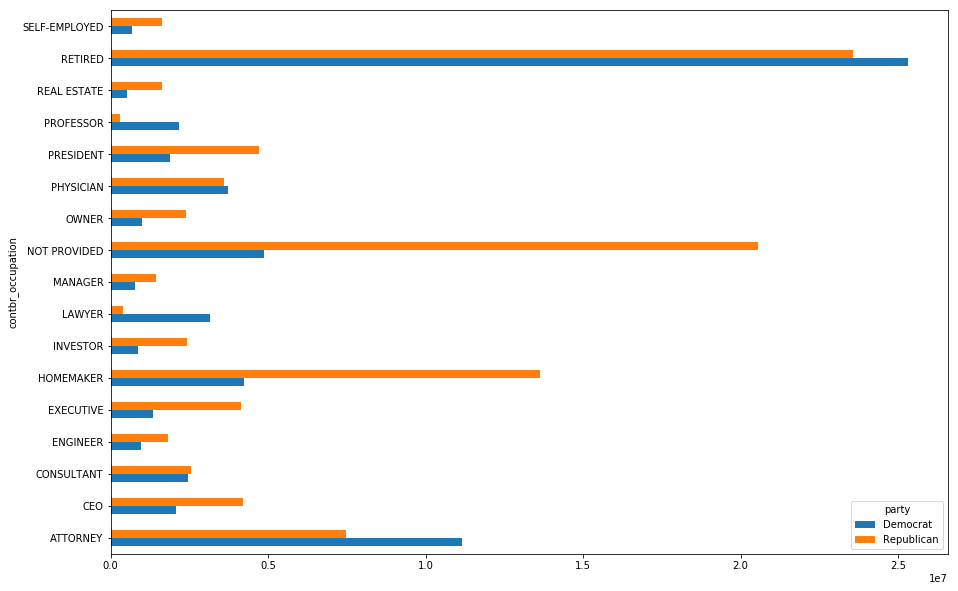

In [124]:
over_2mm.plot(kind='barh')

In [125]:
def get_top_amounts(group, key, n=5):
    totals = group.groupby(key)['contb_receipt_amt'].sum()
    return totals.nlargest(n)

In [126]:
grouped = fec_mrbo.groupby('cand_nm')
grouped.apply(get_top_amounts, 'contbr_occupation', n=7)
grouped.apply(get_top_amounts, 'contbr_employer', n=10)

cand_nm        contbr_employer      
Obama, Barack  RETIRED                  22694358.85
               SELF-EMPLOYED            17080985.96
               NOT EMPLOYED              8586308.70
               INFORMATION REQUESTED     5053480.37
               HOMEMAKER                 2605408.54
                                           ...     
Romney, Mitt   CREDIT SUISSE              281150.00
               MORGAN STANLEY             267266.00
               GOLDMAN SACH & CO.         238250.00
               BARCLAYS CAPITAL           162750.00
               H.I.G. CAPITAL             139500.00
Name: contb_receipt_amt, Length: 20, dtype: float64

### Bucketing Donation Amounts

In [127]:
bins = np.array([0, 1, 10, 100, 1000, 10000,
                 100000, 1000000, 10000000])
labels = pd.cut(fec_mrbo.contb_receipt_amt, bins)
labels

411         (10, 100]
412       (100, 1000]
413       (100, 1000]
414         (10, 100]
415         (10, 100]
             ...     
701381      (10, 100]
701382    (100, 1000]
701383        (1, 10]
701384      (10, 100]
701385    (100, 1000]
Name: contb_receipt_amt, Length: 694282, dtype: category
Categories (8, interval[int64]): [(0, 1] < (1, 10] < (10, 100] < (100, 1000] < (1000, 10000] < (10000, 100000] < (100000, 1000000] < (1000000, 10000000]]

In [128]:
grouped = fec_mrbo.groupby(['cand_nm', labels])
grouped.size().unstack(0)

cand_nm              Obama, Barack  Romney, Mitt
contb_receipt_amt                               
(0, 1]                       493.0          77.0
(1, 10]                    40070.0        3681.0
(10, 100]                 372280.0       31853.0
(100, 1000]               153991.0       43357.0
(1000, 10000]              22284.0       26186.0
(10000, 100000]                2.0           1.0
(100000, 1000000]              3.0           NaN
(1000000, 10000000]            4.0           NaN

In [129]:
plt.figure()

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

In [130]:
bucket_sums = grouped.contb_receipt_amt.sum().unstack(0)
normed_sums = bucket_sums.div(bucket_sums.sum(axis=1), axis=0)
normed_sums
normed_sums[:-2].plot(kind='barh')

### Donation Statistics by State

In [131]:
grouped = fec_mrbo.groupby(['cand_nm', 'contbr_st'])
totals = grouped.contb_receipt_amt.sum().unstack(0).fillna(0)
totals = totals[totals.sum(1) > 100000]
totals[:10]

cand_nm    Obama, Barack  Romney, Mitt
contbr_st                             
AK             281840.15      86204.24
AL             543123.48     527303.51
AR             359247.28     105556.00
AZ            1506476.98    1888436.23
CA           23824984.24   11237636.60
CO            2132429.49    1506714.12
CT            2068291.26    3499475.45
DC            4373538.80    1025137.50
DE             336669.14      82712.00
FL            7318178.58    8338458.81

In [132]:
percent = totals.div(totals.sum(1), axis=0)
percent[:10]

cand_nm    Obama, Barack  Romney, Mitt
contbr_st                             
AK              0.765778      0.234222
AL              0.507390      0.492610
AR              0.772902      0.227098
AZ              0.443745      0.556255
CA              0.679498      0.320502
CO              0.585970      0.414030
CT              0.371476      0.628524
DC              0.810113      0.189887
DE              0.802776      0.197224
FL              0.467417      0.532583

## Conclusion